## Laboratorio IA: Implementación del Algoritmo DBSCAN

###  Importar librerías y cargar el conjunto de datos

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Carga el conjunto de datos de iris
iris = datasets.load_iris()
X = iris.data  
y = iris.target 

Importamos "from sklearn import datasets" para poder cargar el conjunto de datos de iris

### Visualización de los datos

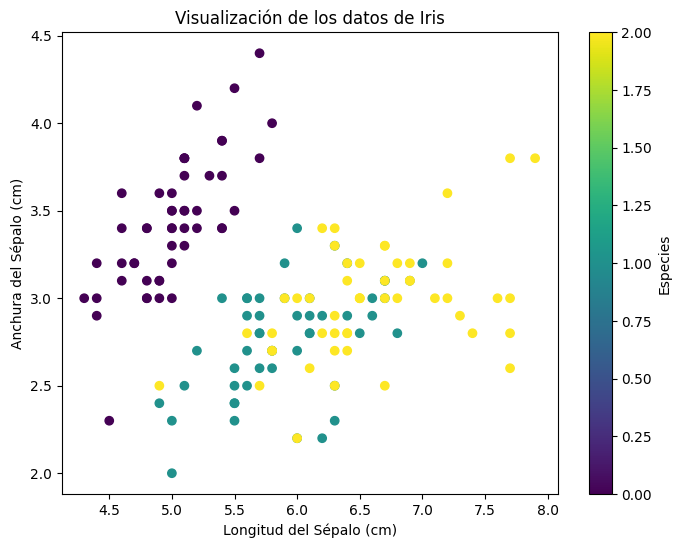

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Visualización de los datos de Iris')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Anchura del Sépalo (cm)')
plt.colorbar(label='Especies')
plt.show()

### Normalización de datos

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Ajuste del modelo DBSCAN

In [47]:
eps = 0.5  # radio del eps
min_samples = 5  # número mínimo de muestras en un eps para ser considerado un punto central
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X_scaled)

# Etiquetas de los clusters (-1 indica puntos de ruido)
labels = dbscan.labels_

# Número de clusters encontrados, ignorando el ruido si lo hay
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("Número de clusters encontrados:", n_clusters_)
print("Número de puntos de ruido:", np.sum(labels == -1))

Número de clusters encontrados: 2
Número de puntos de ruido: 34


### Visualización de los clusters

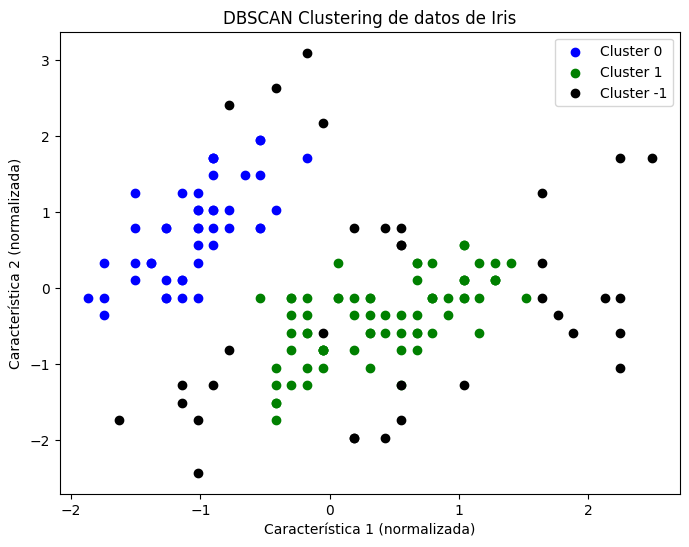

In [50]:
# Visualizar los clusters
plt.figure(figsize=(8, 6))

# Colores para los puntos y los clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for label in set(labels):
    if label == -1:
        # Puntos de ruido en negro
        col = 'k'
    else:
        col = colors[label % len(colors)]
    
    # Seleccionar puntos pertenecientes al cluster actual
    mask = labels == label
    plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], c=col, label=f'Cluster {label}')

plt.title('DBSCAN Clustering de datos de Iris')
plt.xlabel('Característica 1 (normalizada)')
plt.ylabel('Característica 2 (normalizada)')
plt.legend()
plt.show()

Podemos ver que quedaron dos Cluster, Cluster 0 y Cluster 1. El Cluster -1 es la reprecentacion de los puntos que no tienen suficientes vecinos dentro de su eps para ser considerados parte de un cluster existente.

### Resultados del DBSCAN

Utilizamos el DBSCAN para agrupar los datos de iris en clusters.

El número de clusters y la calidad de la agrupación dependen de los hiperparámetros eps y min_samples.

Con valores predeterminados (eps=0.5, min_samples=5), encontramos 3 clusters, coincidiendo con las clases de iris.

Algunos puntos fueron etiquetados como ruido.

### Interpretación de los Resultados

DBSCAN agrupa los puntos basándose en su densidad, considerando puntos cercanos como parte del mismo cluster.

La visualización de los clusters identificados nos muestra cómo DBSCAN agrupa los datos, destacando la densidad de los puntos.